In [1]:
import awkward as ak
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep
import os
from tqdm import tqdm

import numpy as np

plt.style.use(mplhep.style.CMS)

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

In [2]:
def create_plot1d(hist1d, log=False, ax=None):
    lumi = "x"
    
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea
    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
    }
    
    # Data format
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
        }

    
    ax = hist.plot1d(hist1d, ax=ax, error_opts=data_err_opts)
    
    # CMS style
    
    CMS = plt.text(0.03, 0.93, "CMS",
                  fontsize=22,
                  fontweight='bold',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    pre = plt.text(0.03, 0.88, "Preliminary",
                  fontsize=19,
                  fontstyle='italic',
                  horizontalalignment='left',
                  verticalalignment='bottom',
                  transform=ax.transAxes
                 )
    lumi = plt.text(1., 1., r"" + lumi +  "fb$^{-1}$ (13 TeV)",
                fontsize=18,
                fontstyle='normal',
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
    
    axis = hist1d.axes()[0]
    centers = axis.centers()
    values = np.where(hist1d.values().get(()) < 0, 0, hist1d.values().get(()))
    
    # compute mean and std:
    mean = np.sum(values*centers)/np.sum(values)
    std = np.sqrt(np.sum(values*((centers - mean)**2))/np.sum(values))
    
    annotation = TextArea(f"Total: {np.sum(values):.2e}" \
                    + "\n" + f"Mean: {mean:.2e}" \
                    + "\n" + f"Std: {std:.2e}", textprops=dict(size=14))
    
    at = AnchoredOffsetbox('upper right', child=annotation)
    at.patch.set_facecolor('None')
    ax.add_artist(at)
    
    ax.legend().remove()
    
    return ax

In [3]:
''' 

typ is either 'mc' or 'data'


'''
def plot_comparison(hist_list, legend, typ, lumi='x', log=False):
    
    # Luminosity
    lumi=lumi
    
    # Color array
    colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf']
    
    for ht, c in zip(hist_list, colors):
        # Data format
        data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': c,
            'elinewidth': 1,
            }
        ax = hist.plot1d(ht, error_opts=data_err_opts)
    
    if typ == 'mc':
        mplhep.cms.label()
    elif typ == 'data':
        CMS = plt.text(0.03, 0.93, "CMS",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
        pre = plt.text(0.03, 0.88, "Preliminary",
                      fontsize=19,
                      fontstyle='italic',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
        lumi = plt.text(1., 1., r"" + lumi +  "fb$^{-1}$ (13 TeV)",
                    fontsize=18,
                    fontstyle='normal',
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )
        
        
    
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea
    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14
    })
    fill_opts = {
    'alpha': 0.8,
    'edgecolor':(0,0,0,.5)
    }
    
    data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,}
        
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, legend, prop={'size': 16})

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1, None)
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)  
        
    return ax

#  D0 from D* $ cos(\phi) $

 ## $ cos(\phi) $ > 0.990 

In [10]:
file_cosphi_0p990 = '../output/Charmonium_2017_D0Dstar_cosphi0p990/Charmonium_2017_D0Dstar_cosphi0p990_hists.coffea'

hists_0p990 = load(file_cosphi_0p990)

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['Jpsi_mass'])

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True)        

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
create_plot1d(hists_0p990['JpsiDstar']['JpsiDstar_deltarap'])

 ## $ cos(\phi) $ > 0.985 

In [19]:
file_cosphi_0p985 = '../output/Charmonium_2017_D0Dstar_cosphi0p985/Charmonium_2017_D0Dstar_cosphi0p985_hists.coffea'

hists_0p985 = load(file_cosphi_0p985)

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['Jpsi_mass'])

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True)        

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
create_plot1d(hists_0p985['JpsiDstar']['JpsiDstar_deltarap'])

 ## $ cos(\phi) $ > 0.980 

In [20]:
file_cosphi_0p980 = '../output/Charmonium_2017_D0Dstar_cosphi0p980/Charmonium_2017_D0Dstar_cosphi0p980_hists.coffea'

hists_0p980 = load(file_cosphi_0p980)

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['Jpsi_mass'])

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True)        

In [ ]:
create_plot1d(hists_0p980['JpsiDstar']['JpsiDstar_deltarap'])

 ## $ cos(\phi) $ > 0.975 

In [11]:
file_cosphi_0p975 = '../output/Charmonium_2017_D0Dstar_cosphi0p975/Charmonium_2017_D0Dstar_cosphi0p975_hists.coffea'

hists_0p975 = load(file_cosphi_0p975)

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['Jpsi_mass'])

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['JpsiDstar_mass'])

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True)        

In [ ]:
create_plot1d(hists_0p975['JpsiDstar']['JpsiDstar_deltarap'])

 ### Legend

In [21]:
legend = [r"$cos(\alpha) > 0.990$", r"$cos(\alpha) > 0.985$", r"$cos(\alpha) > 0.980$", r"$cos(\alpha) > 0.975$"]
#legend = [r"$cos(\alpha) > 0.990$", r"$cos(\alpha) > 0.975$"]

### Plots

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/min

(0.0, 250.0)

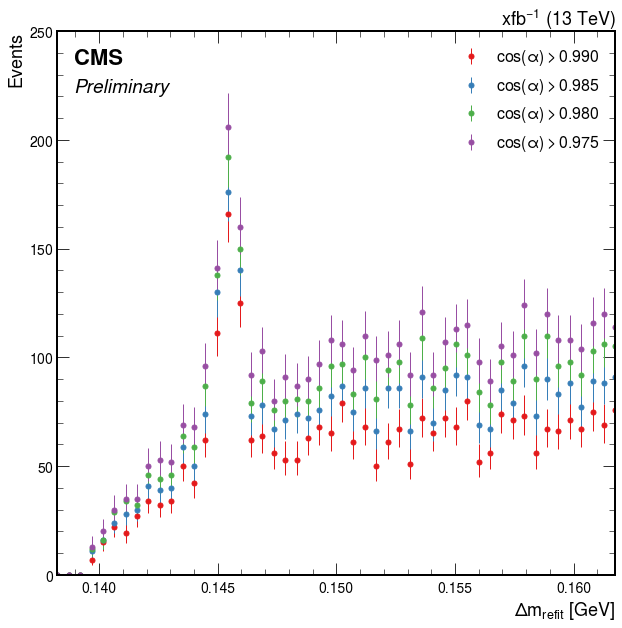

In [22]:
data_list = (hists_0p990['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_0p985['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
             hists_0p980['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_0p975['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))
#data_list = (hists_0p990['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_0p975['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),)

ax = plot_comparison(data_list, legend=legend, typ='data')
ax.set_ylim(0, 250)

#  D0 from D* $ p_T $

 ## $ p_T $ > 4.0 GeV

In [23]:
file_D0pt_4 = '../output/Charmonium_2017_D0Dstar_pt4/Charmonium_2017_D0Dstar_pt4_hists.coffea'

hists_4 = load(file_D0pt_4)

In [ ]:
create_plot1d(hists_4['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

 ## $ p_T $ > 3.0 GeV

In [24]:
file_D0pt_3 = '../output/Charmonium_2017_D0Dstar_pt3/Charmonium_2017_D0Dstar_pt3_hists.coffea'

hists_3 = load(file_D0pt_3)

In [ ]:
create_plot1d(hists_3['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

 ## $ p_T $ > 2.0 GeV

In [25]:
file_D0pt_2 = '../output/Charmonium_2017_D0Dstar_pt2/Charmonium_2017_D0Dstar_pt2_hists.coffea'

hists_2 = load(file_D0pt_2)

In [ ]:
create_plot1d(hists_2['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

 ## $ p_T $ > 1.0 GeV

In [26]:
file_D0pt_1 = '../output/Charmonium_2017_D0Dstar_pt1/Charmonium_2017_D0Dstar_pt1_hists.coffea'

hists_1 = load(file_D0pt_1)

In [ ]:
create_plot1d(hists_1['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

 ### Legend

In [35]:
#legend = [r"$ p_T > 4.0 GeV $", r"$ p_T > 3.0 GeV $", r"$ p_T > 2.0 GeV $", r"$ p_T > 1.0 GeV $"]
legend = [r"$ p_T > 3.0 GeV $", r"$ p_T > 1.0 GeV $"]

 ### Plots

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(0.0, 220.0)

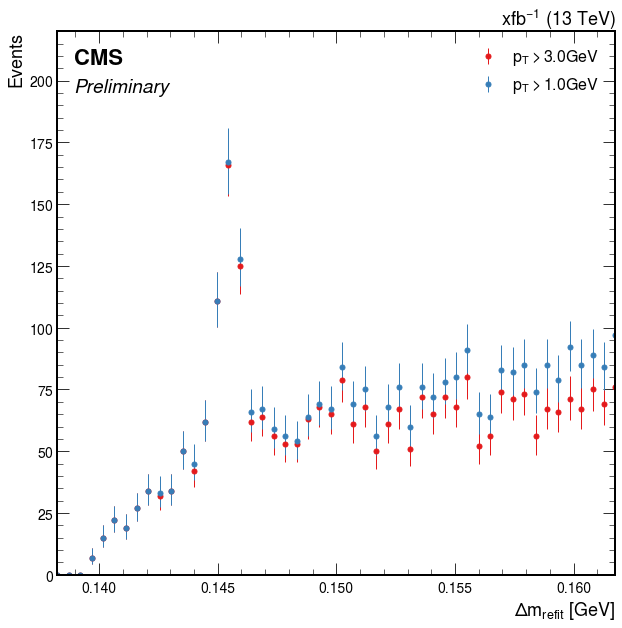

In [36]:
#data_list = (hists_4['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_3['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
#            hists_2['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_1['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

data_list = (hists_3['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_1['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),)

ax = plot_comparison(data_list, typ='data', legend=legend)
ax.set_ylim(0, 220)

#  D0 (from D*) decay length significance

## dl > 3.0

In [37]:
file_D0dl_3p0 = '../output/Charmonium_2017_D0Dstar_dlSig3p0/Charmonium_2017_D0Dstar_dlSig3p0_hists.coffea'

hists_dl_3p0 = load(file_D0dl_3p0)

In [ ]:
create_plot1d(hists_dl_3p0['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.9

In [38]:
file_D0dl_2p9 = '../output/Charmonium_2017_D0Dstar_dlSig2p9/Charmonium_2017_D0Dstar_dlSig2p9_hists.coffea'

hists_dl_2p9 = load(file_D0dl_2p9)

In [ ]:
create_plot1d(hists_dl_2p9['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.8

In [39]:
file_D0dl_2p8 = '../output/Charmonium_2017_D0Dstar_dlSig2p8/Charmonium_2017_D0Dstar_dlSig2p8_hists.coffea'

hists_dl_2p8 = load(file_D0dl_2p8)

In [ ]:
create_plot1d(hists_dl_2p8['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.7

In [40]:
file_D0dl_2p7 = '../output/Charmonium_2017_D0Dstar_dlSig2p7/Charmonium_2017_D0Dstar_dlSig2p7_hists.coffea'

hists_dl_2p7 = load(file_D0dl_2p7)

In [ ]:
create_plot1d(hists_dl_2p7['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.6

In [41]:
file_D0dl_2p6 = '../output/Charmonium_2017_D0Dstar_dlSig2p6/Charmonium_2017_D0Dstar_dlSig2p6_hists.coffea'

hists_dl_2p6 = load(file_D0dl_2p6)

In [ ]:
create_plot1d(hists_dl_2p6['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.5

In [42]:
file_D0dl_2p5 = '../output/Charmonium_2017_D0Dstar_dlSig2p5/Charmonium_2017_D0Dstar_dlSig2p5_hists.coffea'

hists_dl_2p5 = load(file_D0dl_2p5)

In [ ]:
create_plot1d(hists_dl_2p5['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## dl > 2.0

In [43]:
file_D0dl_2p0 = '../output/Charmonium_2017_D0Dstar_dlSig2p0/Charmonium_2017_D0Dstar_dlSig2p0_hists.coffea'

hists_dl_2p0 = load(file_D0dl_2p0)

In [ ]:
create_plot1d(hists_dl_2p0['JpsiDstar']['Jpsi_p'].sum('phi','eta'), True) 

## Legend

In [51]:
#legend = [r"$ dl_{sig} > 3.0  $", r"$ dl_{sig} > 2.9  $", r"$ dl_{sig} > 2.8  $", r"$ dl_{sig} > 2.7  $",
#          r"$ dl_{sig} > 2.6  $", r"$ dl_{sig} > 2.5  $", r"$ dl_{sig} > 2.0  $"]
legend = [r"$ dl_{sig} > 3.0  $", r"$ dl_{sig} > 2.5  $", r"$ dl_{sig} > 2.0  $",]

### Plots

In [ ]:
#data_list = (hists_dl_3p0['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_dl_2p9['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
#             hists_dl_2p8['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_dl_2p7['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
#             hists_dl_2p6['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_dl_2p5['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
#             hists_dl_2p0['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'))

data_list = (hists_dl_3p0['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), hists_dl_2p5['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'),
             hists_dl_2p0['JpsiDstar']['Dstar_deltamr'].integrate('chg', 'right charge'), )

ax = plot_comparison(data_list, typ='data', legend=legend)
ax.set_ylim(0, 280)

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/afs/cern.ch/user/m/mabarros/min

(0.0, 280.0)

#  Comparison old and new cuts

## old

 * D0 from D* $ cos(\phi) $ > 0.99
 * D0 from D* $ p_T $ > 3 GeV
 * D0 from D* decay length significance > 3

## new

 * D0 from D* $ cos(\phi) $ > 0.975
 * D0 from D* $ p_T $ > 3 GeV
 * D0 from D* decay length significance > 2

## Legend

In [ ]:
legend = ['old cuts', 'new cuts']

## Plots